# Importing libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import datetime
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [12,5]

# Combining all the csv files

In [53]:
files = [file for file in os.listdir(r"C:\Users\jaskeerat singh\Desktop\Sales_Data")]
data =pd.DataFrame()

for file in files:
    df = pd.read_csv(r"C:\Users\jaskeerat singh\Desktop\Sales_Data\\" + file)
    data = pd.concat([data,df])

data.to_csv(r"C:\Users\jaskeerat singh\Desktop\Sales_Data\combined.csv",index = False)

# Reading the combined file

In [54]:
data = pd.read_csv(r"C:\Users\jaskeerat singh\Desktop\Sales_Data\combined.csv")

# Dropping null values 

In [55]:
data = data.dropna(how = "all")

# Removing redundant rows

In [57]:
data = data[data["Order ID"] != "Order ID"]
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# Converting datatypes

In [58]:
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"])
data["Price Each"] = pd.to_numeric(data["Price Each"])

# Adding additional Columns

In [59]:
data["total sales"] = data["Quantity Ordered"] * data["Price Each"]
data['month'] = pd.DatetimeIndex(data['Order Date']).month
dataplot = data.groupby(data["month"])["total sales"].sum().to_frame()
dataplot

,total sales
month,
1,3.644513e+06
2,4.404045e+06
3,5.614201e+06
4,6.781340e+06
5,6.305214e+06
6,5.155605e+06
7,5.295552e+06
8,4.488936e+06
9,4.195120e+06


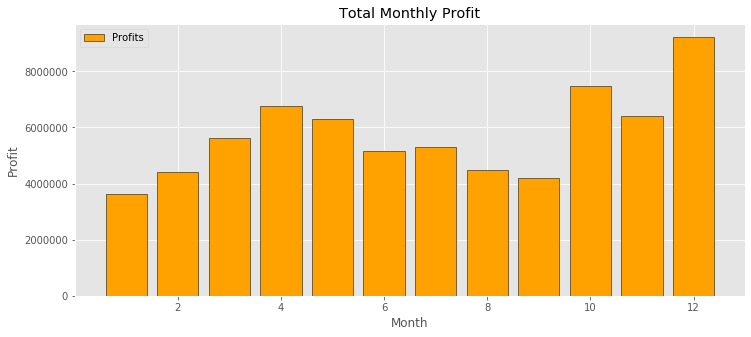

In [60]:
plt.bar(dataplot.index,dataplot["total sales"], color = "#ffa200", edgecolor = "#000000", label = "Profits")
plt.title("Total Monthly Profit")
plt.xlabel("Month")
plt.ylabel("Profit")
plt.legend()
plt.grid(True)
plt.show()

# City with highest sales

In [61]:
data["city"] = data["Purchase Address"].apply(lambda x: x.split(",")[1])
datacity = data.groupby(data["city"])["total sales"].sum().to_frame()
datacity

,total sales
city,
Atlanta,5.590997e+06
Austin,3.639164e+06
Boston,7.323284e+06
Dallas,5.535951e+06
Los Angeles,1.090514e+07
New York City,9.328635e+06
Portland,4.640981e+06
San Francisco,1.652441e+07
Seattle,5.495511e+06


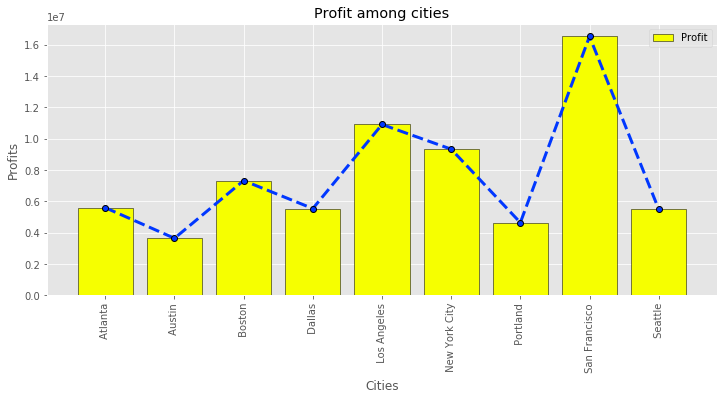

In [62]:
plt.bar(datacity.index, datacity["total sales"], color = "#f6ff00", edgecolor = "#000000", label = "Profit")
plt.plot(datacity, marker = "o", markeredgecolor = "#000000", color = "#0037ff", lw = 3, ls = "--")
plt.title("Profit among cities")
plt.xlabel("Cities")
plt.ylabel("Profits")
plt.xticks(rotation = "vertical")
plt.legend()
plt.grid(True)
plt.show()

# Max Profit from Products sold

In [63]:
data["Product"].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [64]:
dataprod = data.groupby("Product")["total sales"].sum().to_frame()
dataprod

,total sales
Product,
20in Monitor,9.082974e+05
27in 4K Gaming Monitor,4.870195e+06
27in FHD Monitor,2.264849e+06
34in Ultrawide Monitor,4.711116e+06
AA Batteries (4-pack),2.122368e+05
AAA Batteries (4-pack),1.854817e+05
Apple Airpods Headphones,4.698300e+06
Bose SoundSport Headphones,2.691131e+06
Flatscreen TV,2.891400e+06


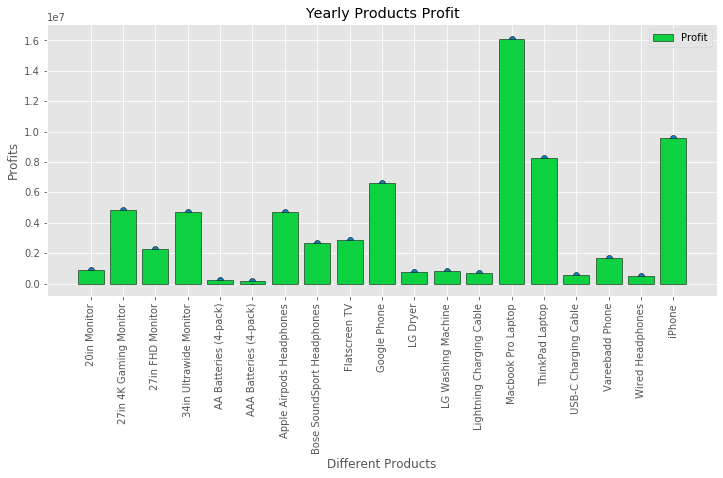

In [65]:
plt.bar(dataprod.index,dataprod["total sales"], label = "Profit", color = "#0dd141", edgecolor = "#000000")
plt.scatter(dataprod.index, dataprod["total sales"], color = "#1380bf", edgecolor = "#000000")
plt.title("Yearly Products Profit")
plt.xlabel("Different Products")
plt.ylabel("Profits")
plt.xticks(rotation = "vertical")
plt.legend()
plt.grid(True)
plt.show()

# Hourly sales

In [66]:
data['hour'] = pd.DatetimeIndex(data["Order Date"]).hour

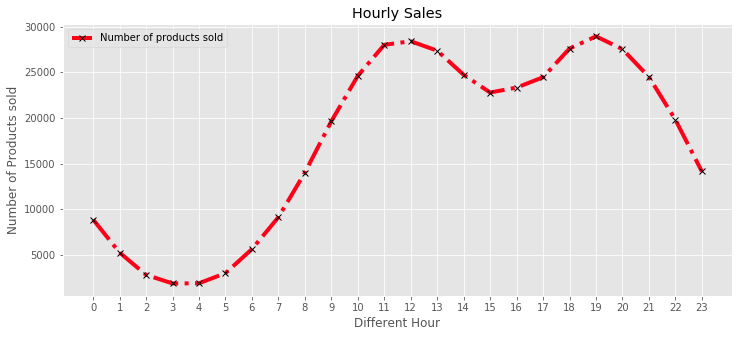

In [67]:
datahour = data.groupby(data["hour"])["Quantity Ordered"].sum().to_frame()
plt.plot(datahour.index, datahour["Quantity Ordered"], label ="Number of products sold", color = "#ff0019", marker = "x", markeredgecolor = "#000000", ls = "-.", lw =4)
plt.title("Hourly Sales")
plt.xlabel("Different Hour")
plt.ylabel("Number of Products sold")
plt.xticks(np.arange(0,24))
plt.legend()
plt.grid(True)
plt.show()

In [68]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total sales,month,city,hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles,9


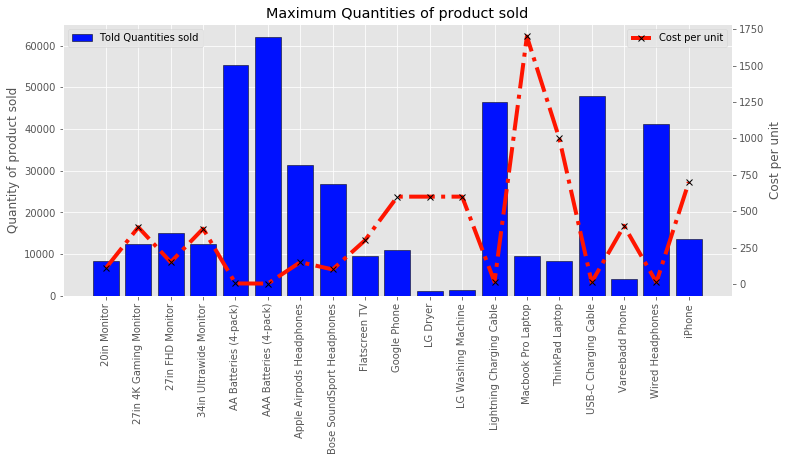

In [93]:
datamax = data.groupby(data["Product"])["Quantity Ordered"].sum().to_frame()
datap = data.groupby(data["Product"])["Price Each"].mean().to_frame()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(datamax.index,datamax["Quantity Ordered"], color = "#0011ff",edgecolor = "#000000",label = "Told Quantities sold")
ax2.plot(datap.index, datap["Price Each"], marker = "x", markeredgecolor = "#000000", color = "#ff1500", ls = "-.", lw = 4,label = "Cost per unit")

plt.title("Maximum Quantities of product sold")
plt.xlabel("Different Products")
ax1.set_ylabel("Quantity of product sold")
ax2.set_ylabel("Cost per unit")

ax1.set_xticklabels(datap.index,rotation = "vertical")
ax1.legend(loc = "upper left")
ax2.legend(loc = "upper right")

plt.grid(False)
plt.show()